This is a sample notebook

In [1]:
import numpy as np
import uproot
import pkgutil
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

#import imageio

In [2]:
def  get_input_arrays(tree, features_list):
    array = np.transpose(tree.arrays(features_list, outputtype=tuple))
    print(array.shape)
    print(array[0])
    return array

def plot_dnn_features(arrays, features_list, nBins=25):   
    
    arrays_shape = arrays.shape
    print(arrays_shape)
    arrays = np.transpose(arrays)
    
    fig, ax = plt.subplots(int(arrays_shape[1]), figsize=(15, 9))
    print(arrays_shape[1])
    
    feature_n = 0
    
    for j in range(int(arrays_shape[1])):            
            
        #for k in range(2):
            
            #if feature_n <= arrays_shape[1] - 1:
                
            ax[j].hist(arrays[j], bins=nBins)
            #ax[j,k].set_title(features_list[feature_n])
                #feature_n += 1
            #else:
            #   break

In [3]:
file = uproot.open('../data/user.pavol.19077308._000001.reco.root')
file


<ROOTDirectory b'reco.root' at 0x000131d3f4e0>

In [4]:
#file.keys()

### Examining ROOT Histograms

In [5]:
ee_2015 = file[b'emu_2015;1']

In [6]:
#ee_2015.keys()

In [7]:
jet_pt_hist = ee_2015[b'jet_pt;1']

In [16]:
#print(jet_pt_hist.edges)
#print(jet_pt_hist.allvariances)
#print(jet_pt_hist)
#print(jet_pt_hist.values)
#print(jet_pt_hist.allnumpy()[0].shape)
#jet_pt_hist.show()

### Examining ROOT Histogram

In [27]:
nominal = file[b'nominal;1']
truth = file[b'truth;1']
nominal

<TTree b'nominal' at 0x00013a95deb8>

In [28]:
#nominal.keys()

In [29]:
features_list = [b'jet_pt', b'jet_eta', b'jet_phi']

In [30]:
features_array = get_input_arrays(nominal, features_list)

(18084, 3)
[array([237179.28 ,  74762.34 ,  69463.18 ,  32478.307,  30199.201],
      dtype=float32)
 array([1.489366  , 1.6157573 , 0.06319311, 0.1796509 , 2.132496  ],
      dtype=float32)
 array([ 2.0246432 , -0.30891806,  1.9914552 ,  2.4876597 , -0.15836567],
      dtype=float32)]


In [32]:
jet_pt = nominal.array(b'jet_pt')
#np.max(np.hstack(jet_pt))

[1.1626e+04 2.1142e+04 1.0035e+04 4.5750e+03 2.1400e+03 9.5800e+02
 5.7800e+02 3.2400e+02 1.5900e+02 1.3100e+02 7.4000e+01 5.0000e+01
 2.5000e+01 1.4000e+01 1.6000e+01 1.5000e+01 6.0000e+00 6.0000e+00
 4.0000e+00 4.0000e+00 8.0000e+00 0.0000e+00 4.0000e+00 4.0000e+00
 4.0000e+00 2.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00]


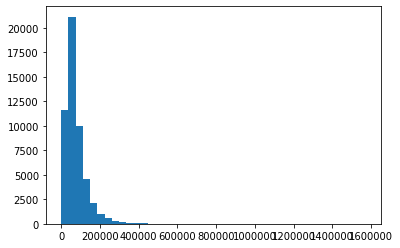

In [24]:
h,b,_=plt.hist(np.hstack(jet_pt),bins=42,range=[25,np.max(np.hstack(jet_pt))])
plt.show()